In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
#import warnings
#warnings.filterwarnings(“ignore”)


In [2]:
data=pd.read_csv("creditcard.csv")
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,Result
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,Result
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,...,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,240.723982,-0.173477,0.202923,0.868027,0.313785,0.004962,0.191067,0.120179,-0.057877,-0.021444,...,0.011559,-0.101324,-0.039138,-0.001128,0.118359,0.023800,0.026277,-0.015521,70.339698,0.039216
std,147.066052,1.318746,1.195083,1.017452,1.268028,1.131101,1.248768,0.860575,0.828433,0.897497,...,0.611034,0.609244,0.369201,0.628296,0.426569,0.468524,0.308202,0.291046,206.447777,0.194254
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,105.000000,-0.901810,-0.174201,0.312139,-0.436332,-0.552683,-0.613937,-0.324460,-0.157950,-0.517152,...,-0.219877,-0.528465,-0.172574,-0.384946,-0.160158,-0.313228,-0.045075,-0.015932,5.980000,0.000000
50%,241.000000,-0.376162,0.277666,0.897601,0.448154,-0.107492,-0.068701,0.117003,0.044961,-0.074016,...,-0.070069,-0.069830,-0.045366,0.091900,0.145526,-0.015710,0.023011,0.022966,17.240000,0.000000
75%,366.000000,1.108861,0.877669,1.509547,1.140908,0.466815,0.490715,0.567376,0.262158,0.415102,...,0.102520,0.311334,0.073547,0.429625,0.439774,0.263885,0.115571,0.087914,57.750000,0.000000
max,499.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


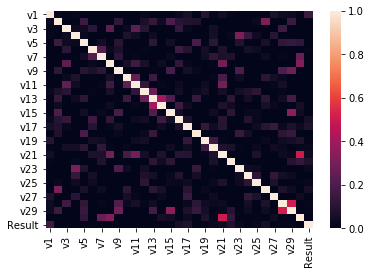

In [35]:
df=pd.DataFrame(data)

corr=df.corr()
ax=sns.heatmap(corr,vmin=0,vmax=1)

In [ ]:
sns.pairplot(data)

In [4]:
y=data.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int64

In [5]:
x=data.iloc[:,:-1]
x.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [6]:
x.isnull().sum()

v1     0
v2     0
v3     0
v4     0
v5     0
v6     0
v7     0
v8     0
v9     0
v10    0
v11    0
v12    0
v13    0
v14    0
v15    0
v16    0
v17    0
v18    0
v19    0
v20    0
v21    0
v22    0
v23    0
v24    0
v25    0
v26    0
v27    0
v28    0
v29    0
v30    0
dtype: int64

In [7]:
y.isnull().sum()

0

In [8]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=42)

In [9]:
LR=LogisticRegression()
LR.fit(train_x,train_y)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
pred=LR.predict(test_x)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [11]:
LR.score(test_x,pred)

1.0

In [12]:
print(classification_report(test_y,pred))
#Confusion_matrix(test_y,pred)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       194
           1       0.00      0.00      0.00         5

   micro avg       0.95      0.95      0.95       199
   macro avg       0.49      0.49      0.49       199
weighted avg       0.95      0.95      0.95       199



In [13]:
print(confusion_matrix(test_y,pred))

[[190   4]
 [  5   0]]


In [14]:
print("Accuracy_score=",accuracy_score(test_y,pred))

Accuracy_score= 0.9547738693467337


In [15]:
df1 = pd.DataFrame({'Actual':test_y, 'Predicted': pred})
print(df1.head(25))

     Actual  Predicted
327       0          0
579       0          0
513       0          0
362       0          0
265       0          0
436       0          0
450       0          1
361       0          0
314       0          0
90        0          0
81        0          0
275       0          0
444       0          0
356       0          0
503       0          0
63        0          0
54        0          0
463       0          0
210       0          1
357       0          0
109       0          0
382       0          0
587       0          0
608       0          0
553       0          0


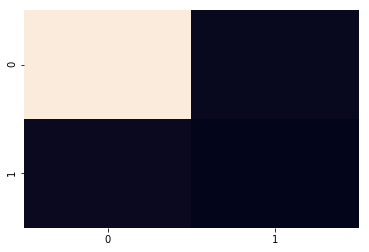

In [16]:
z=confusion_matrix(test_y,pred)
ax = sns.heatmap(z, cbar=False)

AUC: 0.490


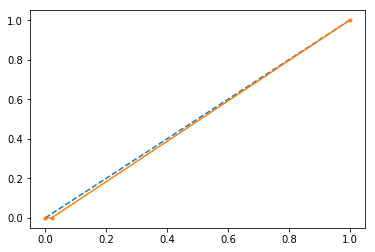

In [17]:
# calculate AUC
auc = roc_auc_score(test_y, pred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_y, pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
RFR=RandomForestRegressor()
RFR.fit(train_x,train_y)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
PredRFR=RFR.predict(test_x)

PredRFR

array([0. , 0. , 0.2, 0.2, 0. , 0.2, 0.2, 0.1, 0. , 0. , 0. , 0. , 0. ,
       0. , 0.2, 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
       0. , 0.5, 0.1, 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. ,
       0.1, 0. , 0.1, 0. , 0.1, 0.1, 0. , 0.1, 0. , 0. , 0. , 0.2, 0.1,
       0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0.1, 0. , 0. ,
       0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. ,
       0.3, 0. , 0. , 0.4, 0.2, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.3, 0. , 0.4, 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.2, 0. ,
       0.3, 0.4, 0. , 0. , 0. , 0.2, 0.1, 0. , 0. , 0.3, 0. , 0. , 0. ,
       0. , 0.2, 0. , 0.2, 0.1, 0.2, 0.1, 0. , 0.4, 0. , 0. , 0. , 0.1,
       0.4, 0.6, 0. , 0. , 0.1, 0. , 0. , 0. , 0.2, 0.5, 0. , 0.1, 0. ,
       0.1, 0. , 0. , 0. , 0. , 0. , 0.6, 0.2, 0.1, 0. , 0. , 0. , 0. ,
       0. , 0. , 0.1, 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [21]:
RFR.score(test_x,PredRFR)

1.0

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
RFC=RandomForestClassifier()
RFC.fit(train_x,train_y)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
predrfc=RFC.predict(test_x)

predrfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [25]:
RFC.score(test_x,predrfc)

1.0

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
GBC=GradientBoostingClassifier()
GBC.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [28]:
predGBC=GBC.predict(test_x)

predGBC

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [29]:
GBC.score(test_x,predGBC)

1.0

In [30]:
import xgboost as xgb

In [31]:

#xgb.fit(train_x,train_y)



In [32]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(train_x, train_y)
print(model.score(train_x, train_y))
abpred=model.predict(test_x)
print(abpred)
model.score(test_x,test_y)

0.7427775446819611
[0.02421308 0.18627451 0.10569106 0.13486842 0.02857143 0.69291339
 0.08695652 0.07594937 0.03875969 0.02421308 0.02421308 0.02421308
 0.20920502 0.20920502 0.20920502 0.02421308 0.03875969 0.13486842
 0.4137931  0.34591195 0.02421308 0.20895522 0.12711864 0.13333333
 0.4862069  0.02421308 0.02421308 0.         0.08695652 0.01515152
 0.12711864 0.07784431 0.54658385 0.02421308 0.02857143 0.02857143
 0.02857143 0.07784431 0.02857143 0.13486842 0.13333333 0.07784431
 0.02857143 0.10144928 0.25730994 0.07784431 0.13333333 0.02421308
 0.02857143 0.12751678 0.02421308 0.13934426 0.0647482  0.12711864
 0.02857143 0.17272727 0.02421308 0.12751678 0.13486842 0.01694915
 0.13486842 0.07784431 0.         0.12751678 0.10569106 0.13084112
 0.12751678 0.0647482  0.03875969 0.02421308 0.02421308 0.03875969
 0.02857143 0.07784431 0.         0.02421308 0.07784431 0.13486842
 0.01694915 0.07594937 0.12751678 0.33707865 0.02421308 0.00900901
 0.10144928 0.03875969 0.02421308 0.0242130

-0.44935209089167905